# Grid search

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
l = []
grid_search_results = pd.read_csv('./results/from_original_impl/grid_search_lr_meta_optimizer_mnist.csv', delimiter='|')

for i in range(len(grid_search_results['train_loss_trajectory'])):
    l.append(eval(grid_search_results['train_loss_trajectory'][i]))
grid_search_results['train_loss_trajectory'] = pd.Series(l)

l = []
for i in range(len(grid_search_results['val_loss_trajectory'])):
    l.append(eval(grid_search_results['val_loss_trajectory'][i]))
grid_search_results['val_loss_trajectory'] = pd.Series(l)
grid_search_results

,learning_rate,best_val,train_loss_trajectory,val_loss_trajectory
0,1.0000,230.258450,"[230.31693, 230.25845, 230.25854, 230.25854, 2...","[230.25845, 230.2585, 230.25851, 230.25848, 23..."
1,0.1000,230.197630,"[233.16667, 230.18816, 230.18074, 230.20064, 2...","[230.23042, 230.21008, 230.20891, 230.21295, 2..."
2,0.0100,74.542366,"[108.01113, 77.28441, 74.363335, 72.51944, 80....","[82.59769, 74.95468, 74.542366, 79.39585, 114...."
3,0.0010,230.207780,"[230.1698, 230.18997, 230.19983, 230.1812, 230...","[230.22498, 230.21623, 230.23582, 230.21542, 2..."
4,0.0001,150.463870,"[230.2917, 230.1135, 167.03613, 153.1972, 171....","[230.23273, 212.73311, 150.46387, 162.36511, 1..."


/tmp/ipykernel_13254/814922673.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


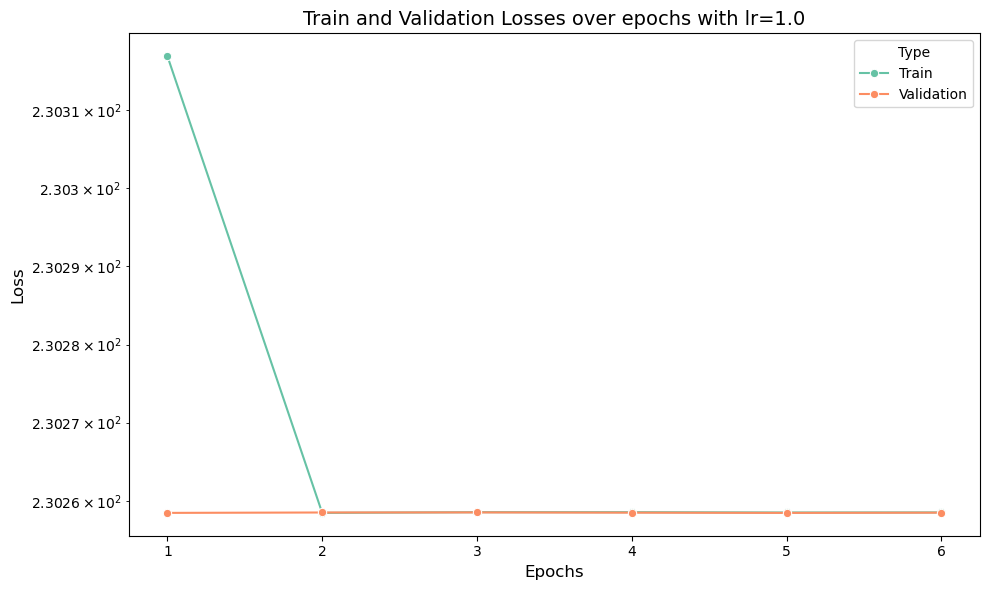

/tmp/ipykernel_13254/814922673.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


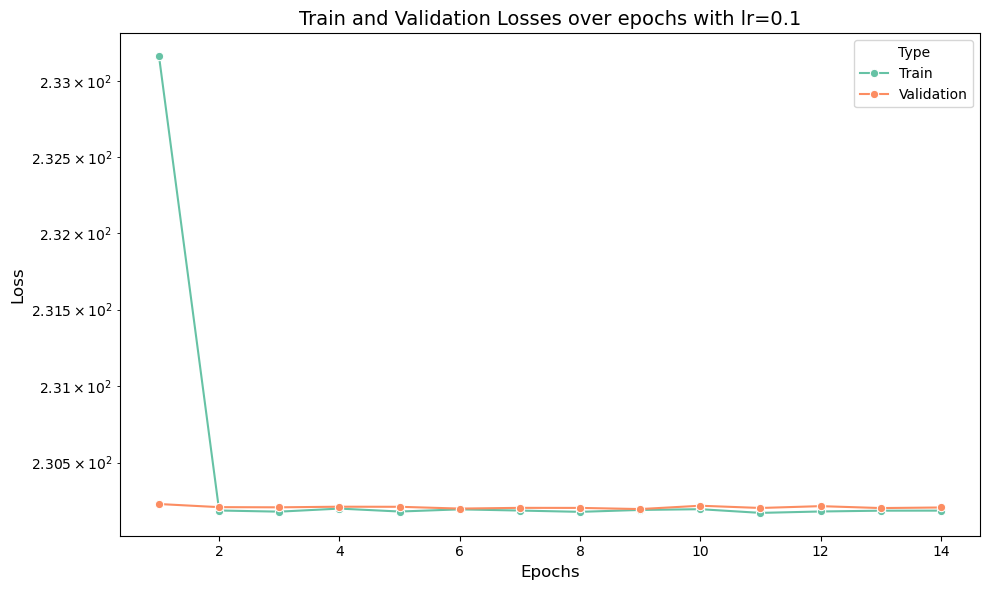

/tmp/ipykernel_13254/814922673.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


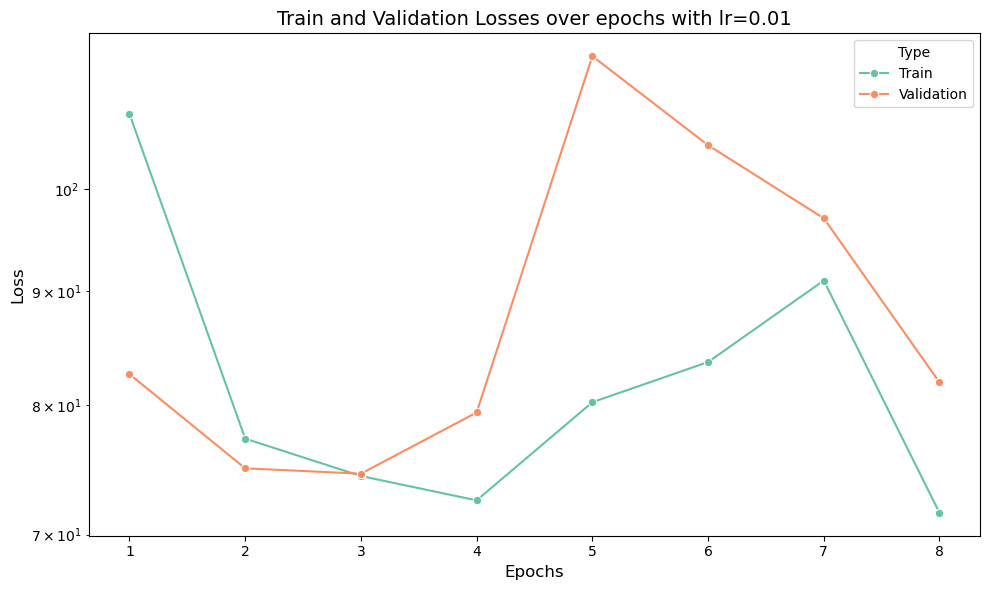

/tmp/ipykernel_13254/814922673.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


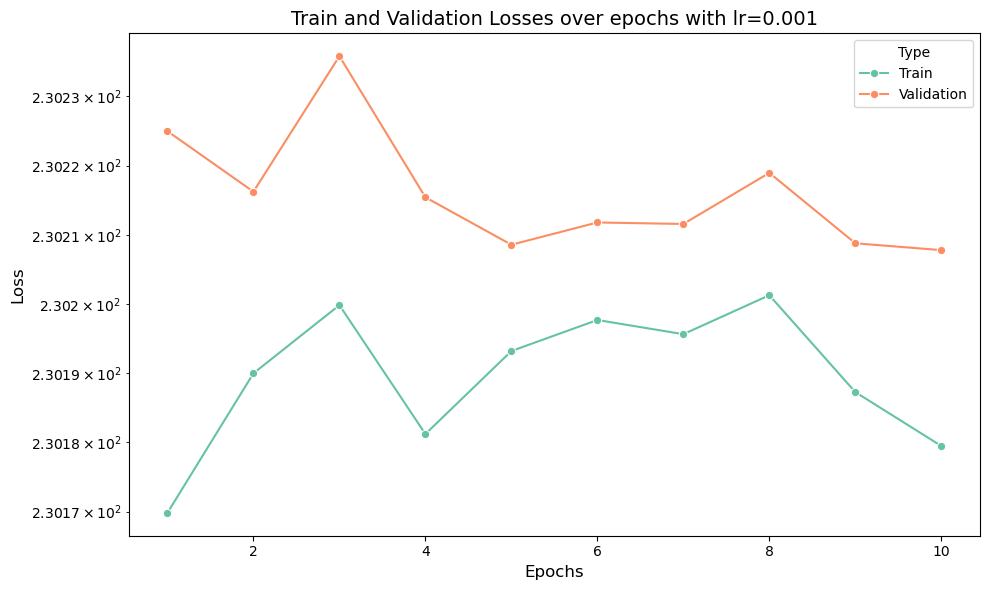

/tmp/ipykernel_13254/814922673.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


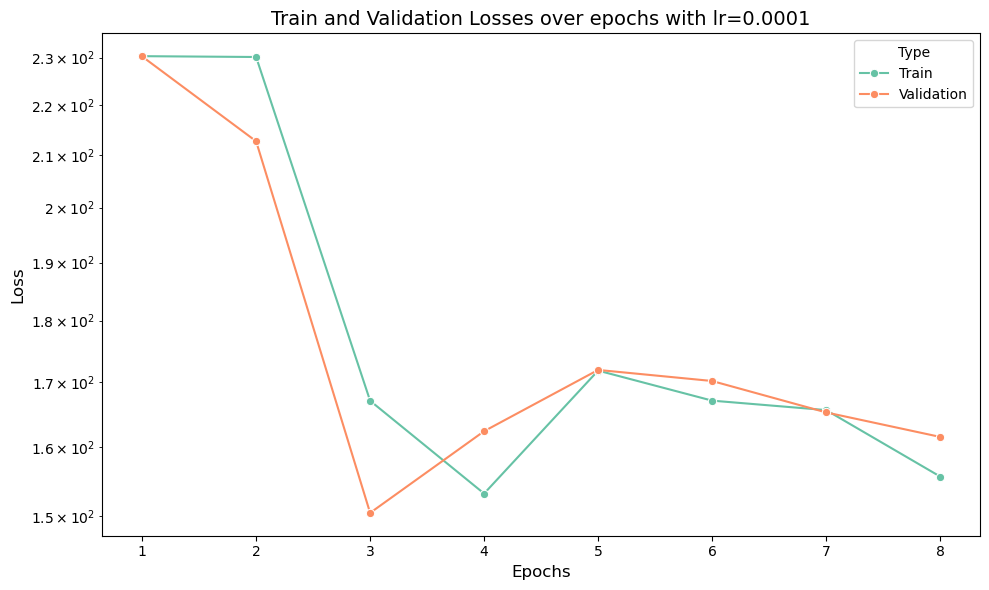

In [8]:
train_loss_trajectories= grid_search_results['train_loss_trajectory'].to_numpy()
val_loss_trajectories= grid_search_results['val_loss_trajectory'].to_numpy()

for i in range(len(grid_search_results)):

    data = pd.DataFrame({
        'Epoch': [i for i in range(1, len(train_loss_trajectories[i])+1)] * 2,  
        'Loss': np.append(train_loss_trajectories[i], val_loss_trajectories[i]),
        'Type': ['Train'] * len(train_loss_trajectories[i]) + ['Validation'] * len(val_loss_trajectories[i])
    })
    colors = sns.color_palette("Set2", n_colors=6)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')

    # Configurazioni del grafico
    plt.title(f'Train and Validation Losses over epochs with lr={grid_search_results['learning_rate'][i]}', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.yscale('log')
    plt.legend(title='Type', fontsize=10)
    plt.tight_layout()

    # Mostra il grafico
    plt.show()


# Grid search learning rate of standard optimizers

/tmp/ipykernel_681/143584301.py:13: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=data, x='Learning rate', y='Loss', hue='Optimizer', palette= colors, marker='o')


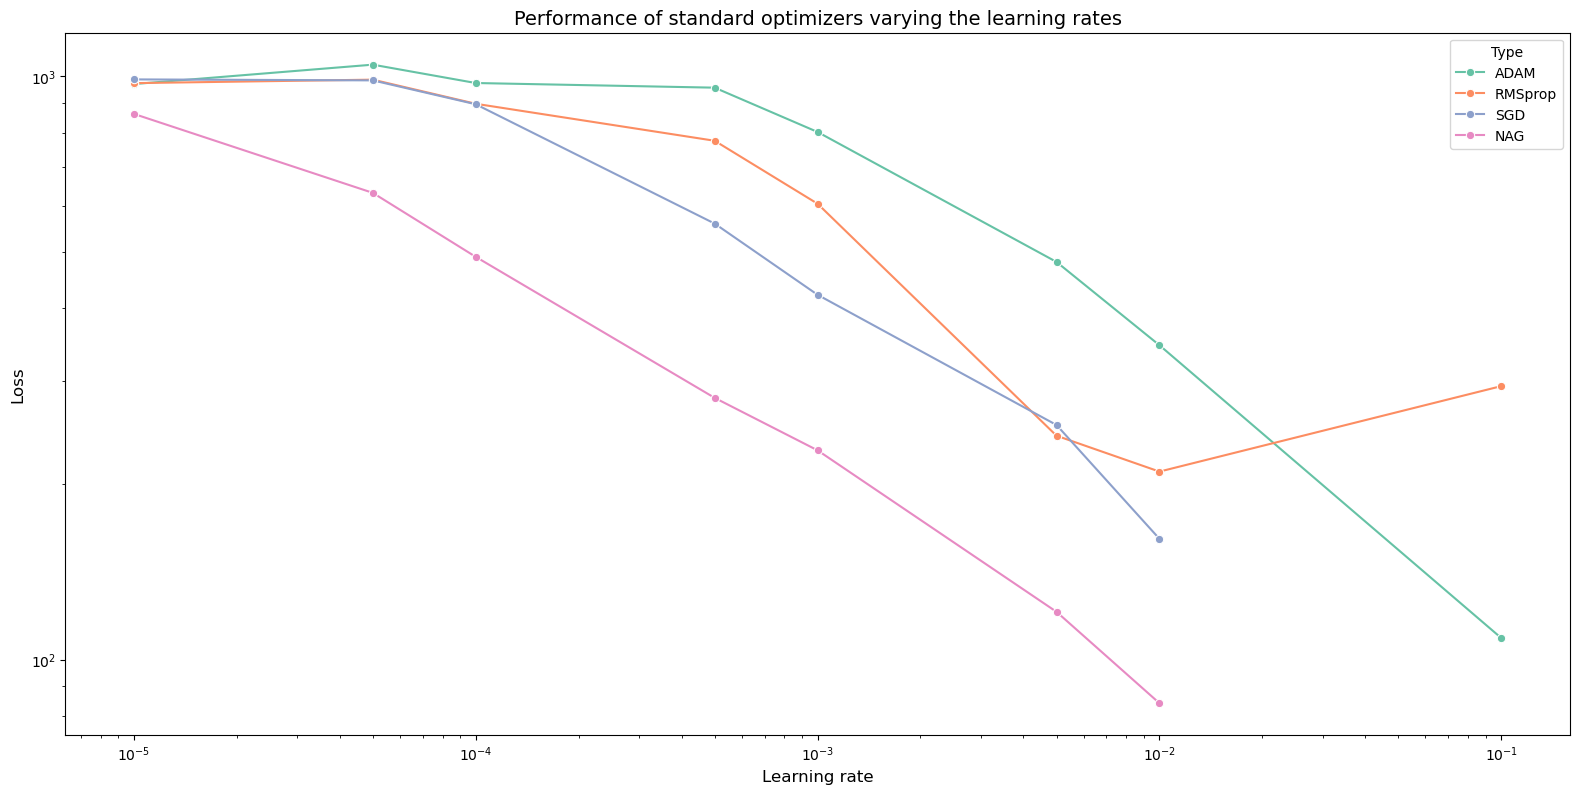

In [37]:
grid_search_results = pd.read_csv('./results/from_original_impl/grid_search_lr_std_opt_quadratic.csv', delimiter='|')

data = pd.DataFrame({
    'Learning rate': grid_search_results['learning_rate'],
    'Loss': grid_search_results['loss_trajectory'],
    'Optimizer': grid_search_results['optimizer']
})

colors = sns.color_palette("Set2", n_colors=6)


plt.figure(figsize=(16,8))
sns.lineplot(data=data, x='Learning rate', y='Loss', hue='Optimizer', palette= colors, marker='o')

# Configurazioni del grafico
plt.title(f'Performance of standard optimizers varying the learning rates', fontsize=14)
plt.xlabel('Learning rate', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(title='Type', fontsize=10)
plt.tight_layout()

plt.yscale('log')
plt.xscale('log')
# Mostra il grafico
plt.show()


# Training plots

In [7]:
l = []
grid_search_results = pd.read_csv('./results/from_original_impl/training_meta_optimizer_mnist.csv', delimiter='|')
grid_search_results.iloc[0, 0] = "meta-opt-0.0001" 

for i in range(len(grid_search_results['train_loss_trajectory'])):
    l.append(eval(grid_search_results['train_loss_trajectory'][i]))
grid_search_results['train_loss_trajectory'] = pd.Series(l)

l = []
for i in range(len(grid_search_results['val_loss_trajectory'])):
    l.append(eval(grid_search_results['val_loss_trajectory'][i]))
grid_search_results['val_loss_trajectory'] = pd.Series(l)
grid_search_results

,model,best_val,train_loss_trajectory,val_loss_trajectory
0,meta-opt-0.0001,230.20892,"[238.11076, 230.28455, 230.21326, 230.19913, 2...","[230.39134, 230.24611, 230.22408, 230.21442, 2..."
1,meta-opt-0.01,65.48864,"[147.97646, 93.344345, 80.78656, 76.273994, 74...","[106.792725, 86.61415, 78.37422, 75.84533, 75...."


/tmp/ipykernel_27392/590325561.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


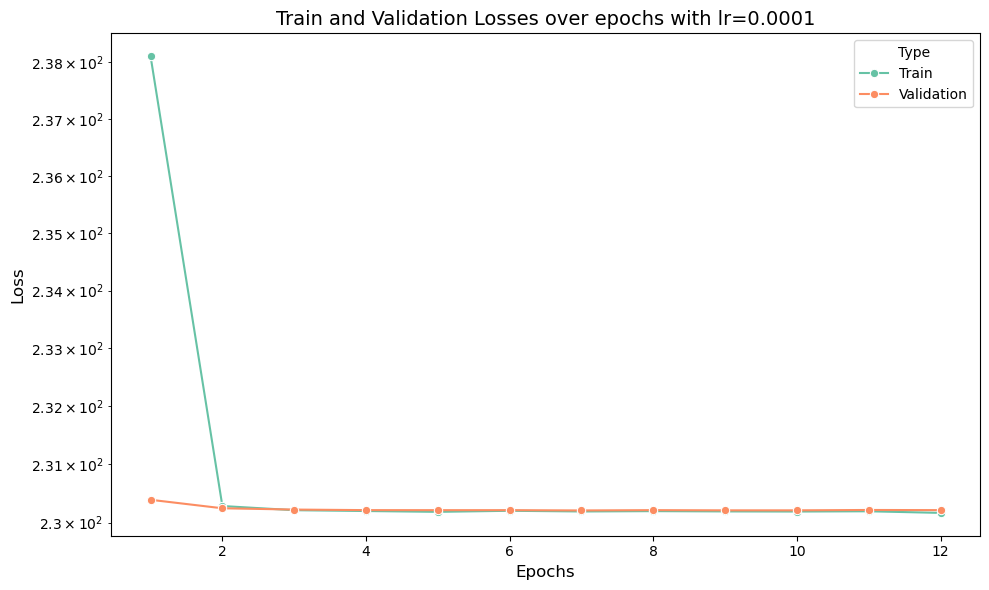

/tmp/ipykernel_27392/590325561.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


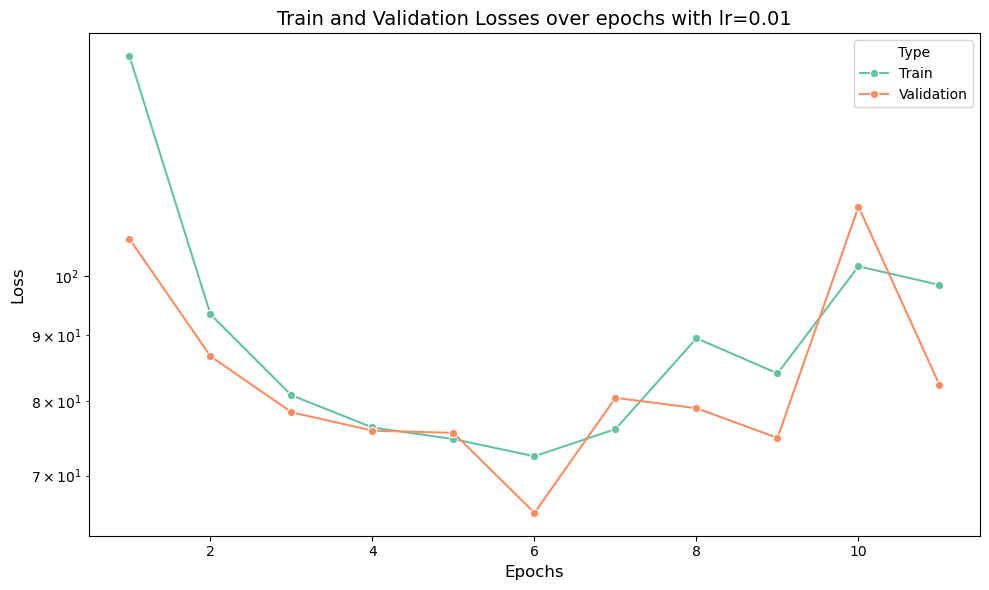

In [6]:
train_loss_trajectories= grid_search_results['train_loss_trajectory'].to_numpy()
val_loss_trajectories= grid_search_results['val_loss_trajectory'].to_numpy()

for i in range(len(grid_search_results)):

    data = pd.DataFrame({
        'Epoch': [i for i in range(1, len(train_loss_trajectories[i])+1)] * 2,  
        'Loss': np.append(train_loss_trajectories[i], val_loss_trajectories[i]),
        'Type': ['Train'] * len(train_loss_trajectories[i]) + ['Validation'] * len(val_loss_trajectories[i])
    })
    colors = sns.color_palette("Set2", n_colors=6)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')

    # Configurazioni del grafico
    plt.title(f'Train and Validation Losses over epochs with lr={grid_search_results['model'][i].split('-')[-1]}', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.yscale('log')
    plt.legend(title='Type', fontsize=10)
    plt.tight_layout()

    # Mostra il grafico
    plt.show()


Number of epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Number of epochs:   1%|          | 1/100 [10:57<18:05:12, 657.70s/it]

100000000000000000 261.02893


Number of epochs:   2%|▏         | 2/100 [23:43<19:38:23, 721.46s/it]

261.02893 253.28528


Number of epochs:   3%|▎         | 3/100 [41:41<23:49:19, 884.11s/it]

253.28528 249.99017


Number of epochs:   4%|▍         | 4/100 [52:39<21:11:47, 794.87s/it]

249.99017 247.7804


Number of epochs:   5%|▌         | 5/100 [1:03:07<19:23:14, 734.68s/it]

247.7804 245.75954


Number of epochs:   6%|▌         | 6/100 [1:13:55<18:24:34, 705.05s/it]

245.75954 244.28859


Number of epochs:   7%|▋         | 7/100 [1:24:46<17:45:49, 687.63s/it]

244.28859 243.54652


Number of epochs:   8%|▊         | 8/100 [1:35:32<17:13:52, 674.27s/it]

243.54652 241.83427


Number of epochs:   9%|▉         | 9/100 [1:45:53<16:37:18, 657.56s/it]

241.83427 241.64195


Number of epochs:  10%|█         | 10/100 [1:57:43<16:50:39, 673.77s/it]

241.64195 241.60141


Number of epochs:  11%|█         | 11/100 [2:11:01<17:36:00, 711.91s/it]

241.60141 240.70868


Number of epochs:  12%|█▏        | 12/100 [2:28:40<19:58:42, 817.30s/it]

240.70868 240.0246


Number of epochs:  14%|█▍        | 14/100 [2:49:32<17:10:55, 719.26s/it]

240.0246 239.63496


Number of epochs:  15%|█▌        | 15/100 [3:00:20<16:28:12, 697.56s/it]

239.63496 239.28154


Number of epochs:  16%|█▌        | 16/100 [3:10:59<15:52:06, 680.08s/it]

239.28154 239.22261


Number of epochs:  17%|█▋        | 17/100 [3:21:21<15:16:43, 662.69s/it]

239.22261 238.67326


Number of epochs:  18%|█▊        | 18/100 [3:31:30<14:43:31, 646.48s/it]

238.67326 238.39111


Number of epochs:  19%|█▉        | 19/100 [3:41:52<14:22:49, 639.13s/it]

238.39111 238.0138


Number of epochs:  21%|██        | 21/100 [4:03:13<14:01:16, 638.95s/it]

238.0138 237.65704


Number of epochs:  22%|██▏       | 22/100 [4:13:33<13:43:17, 633.30s/it]

237.65704 237.35573


Number of epochs:  26%|██▌       | 26/100 [4:54:22<12:36:32, 613.42s/it]

237.35573 236.84164


Number of epochs:  28%|██▊       | 28/100 [5:14:51<12:16:17, 613.58s/it]

236.84164 236.71773


Number of epochs:  29%|██▉       | 29/100 [5:24:56<12:03:03, 611.03s/it]

236.71773 236.40138


Number of epochs:  31%|███       | 31/100 [5:45:35<11:48:34, 616.15s/it]

236.40138 236.15236


Number of epochs:  33%|███▎      | 33/100 [6:05:50<11:23:54, 612.45s/it]

236.15236 236.00145


Number of epochs:  34%|███▍      | 34/100 [6:16:04<11:14:12, 612.92s/it]

236.00145 235.75427


Number of epochs:  35%|███▌      | 35/100 [6:26:11<11:01:56, 611.02s/it]

235.75427 235.70335


Number of epochs:  36%|███▌      | 36/100 [6:36:41<10:57:54, 616.78s/it]

235.70335 235.39984


Number of epochs:  38%|███▊      | 38/100 [6:56:47<10:29:44, 609.43s/it]

235.39984 235.2258


Number of epochs:  40%|████      | 40/100 [7:16:57<10:07:22, 607.38s/it]

235.2258 235.03276


Number of epochs:  44%|████▍     | 44/100 [8:07:32<10:20:30, 664.82s/it]


Early stopping triggered.
Best val loss: 235.03276
['meta-opt-0.1', 235.03276, [271.01276, 255.8523, 251.13416, 246.16724, 245.2915, 246.15738, 243.97488, 242.97739, 242.5203, 242.50742, 241.62329, 240.30713, 239.89633, 238.88895, 238.99667, 239.39694, 239.2721, 239.04358, 238.62585, 238.62732, 238.9445, 238.31729, 237.1866, 237.50815, 237.22842, 237.12527, 237.25003, 236.87431, 237.16394, 236.81502, 236.13217, 237.10196, 236.45474, 235.85062, 236.90894, 235.15901, 236.29227, 235.10274, 235.5074, 235.39262, 235.31668, 235.2159, 235.32504, 234.50107, 234.87932], [261.02893, 253.28528, 249.99017, 247.7804, 245.75954, 244.28859, 243.54652, 241.83427, 241.64195, 241.60141, 240.70868, 240.0246, 240.36266, 239.63496, 239.28154, 239.22261, 238.67326, 238.39111, 238.0138, 238.0237, 237.65704, 237.35573, 237.46448, 237.77345, 237.52304, 236.84164, 237.32347, 236.71773, 236.40138, 236.57263, 236.15236, 236.15912, 236.00145, 235.75427, 235.70335, 235.39984, 235.98439, 235.2258, 235.33438, 235.032

/tmp/ipykernel_15101/3192056391.py:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')


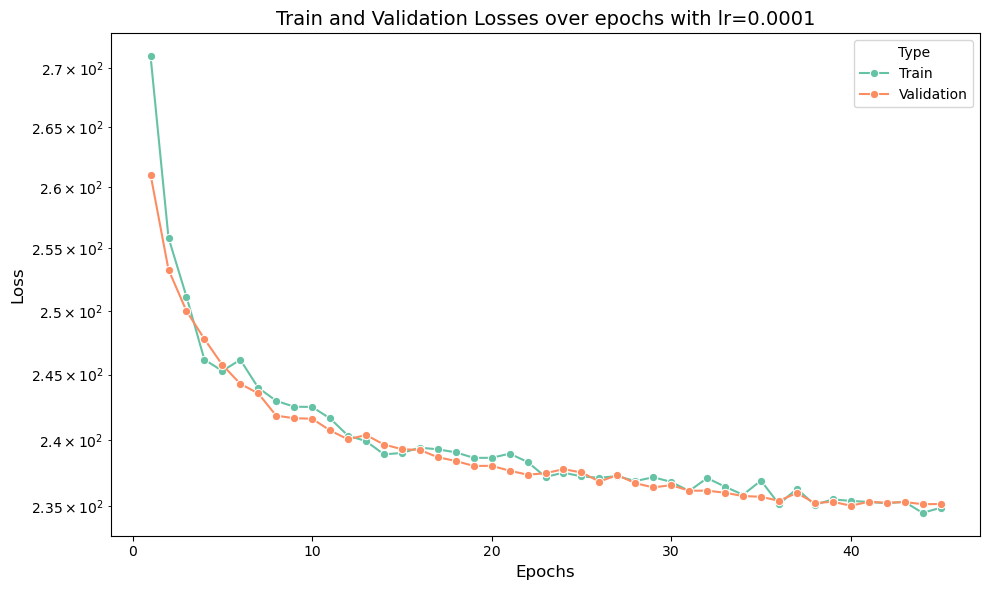

In [11]:
import torch

from impl.mnist_problem import MNISTLoss, MNISTNet
from impl.utils import train_outer_model


best_validation_loss, meta_optimizer_mnist_lr_0_0001, train_loss_trajectory, val_loss_trajectory = train_outer_model(MNISTLoss, MNISTNet, n_epochs=100, lr=0.0001, out_mul=.1, preproc=True)
print('Best val loss:', best_validation_loss)
torch.save(meta_optimizer_mnist_lr_0_0001, './models/meta-optimizer-mnist-0_0001-retest.pth')
print([f"meta-opt-0.1", best_validation_loss, train_loss_trajectory, val_loss_trajectory])

data = pd.DataFrame({
    'Epoch': [i for i in range(1, len(train_loss_trajectory)+1)] * 2,  
    'Loss': np.append(train_loss_trajectory, val_loss_trajectory),
    'Type': ['Train'] * len(train_loss_trajectory) + ['Validation'] * len(val_loss_trajectory)
})
colors = sns.color_palette("Set2", n_colors=6)

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Epoch', y='Loss', hue='Type', palette=colors, marker='o')

# Configurazioni del grafico
plt.title(f'Train and Validation Losses over epochs with lr={0.0001}', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.yscale('log')
plt.legend(title='Type', fontsize=10)
plt.tight_layout()

# Mostra il grafico
plt.show()